<a href="https://colab.research.google.com/github/WMinerva292/WMinerva292/blob/main/25thOct_FeatureSelection_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
  ### **Hey Everyone, Good Morning. Hope you all are well. Today we are going to understand the entire concept of Feature Selection. So, let's wait for our peers to join. We'll begin at 7:07 AM**

<hr>

# **Table of Content**
  * **Automated Viz Tools for EDA**
  * **Feature Selection Techniques and Tools**

<hr>

# **Libraries Required**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<hr>

# **Automated Tools for EDA**

### **Autoviz - Automatic Visualization**
  * **Link: https://github.com/AutoViML/AutoViz**

In [ ]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 865.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
filename = "/content/customer_churn.csv"
target_name = "Churn"

**Initialzing AutoViz**

In [ ]:
from autoviz import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [ ]:
AV = AutoViz_Class()

* **Parameters**

  * **sep: File separator (comma, semi-colon, tab, or any column-separating value). I used “,” because it’s a CSV file.**
  * **depVar: Target variable in your dataset; leave empty if not applicable.**
  * **dfte: Input data frame for plotting charts; leave empty if providing a filename. (example below)**
  * **header: Row number of the header row in your file (0 for the first row).**
  * **verbose: 0 for minimal info and charts, 1 for more info and charts, or 2 for saving charts locally without display.**
  * **chart_format: ‘svg’, ‘png’, ‘jpg’, ‘bokeh’, ‘server’, or ‘html’ for displaying or saving charts in various formats, depending on the verbose option.**
  * **lowess: Use regression lines for each pair of continuous variables against the target variable in small datasets; avoid using large datasets (>100,000 rows)**
  * **max_rows_analyzed: Limit the max number of rows for chart display, particularly useful for very large datasets (millions of rows) to reduce**
  
  * **chart generation time. A statistically valid sample will be used.**
  * **max_cols_analyzed: Limit the number of continuous variables to be analyzed.**
  * **save_plot_dir: Directory for saving plots. The default is None, which saves plots under the current directory in a subfolder named AutoViz_Plots. If the save_plot_dir doesn’t exist, it will be created.**

In [ ]:
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar = target_name,
    verbose = 2,
    lowess = False,
    chart_format = "svg",
    max_rows_analyzed = 150000,
    max_cols_analyzed = 30,
    save_plot_dir = None,
)

TypeError: 'NoneType' object is not iterable

<img src = "/content/Saves/Churn/Dist_Plots_Numerics.svg"/>

<hr>

# **Sweetviz - Automated EDA**


In [ ]:
!pip install sweetviz

In [ ]:
df = pd.read_csv(filename)

In [ ]:
import sweetviz as sv

In [ ]:
report = sv.analyze(df)

In [ ]:
report.show_html("Reports.html")

# **PyCaret: Automated Model Selection**

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
from pycaret.classification import *
import numpy as np

results = setup(
    df,
    target=target_name,
    numeric_imputation="median",
    normalize=True,
    normalize_method="robust",
)

In [ ]:
best = compare_models()

<hr>

# **Feature Selection**

### **Supervised Feature Selection Techniques**
  * **Filter-based Techniques**
  * **Wrapper-based Techniques**
  * **Embedded Methods**

#### **Filter-based Techniques**
  **Filter-based approaches assess the value of each feature without considering the performance of a specific machine learning algorithm. You’re evaluating just the data itself to understand how the data correlates with each other.**

  * **`Information Gain`: The amount of information gained about a random variable or features from observing another random variable or features**
  * **`Missing value Ratio`: You take the decision based on the number of missing values in the features**
  * **`Chi-square Test`: This is a statistical test that helps us in accessing the relationship between two categorical variables**


<hr>

* **Information Gain**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

# Load the diabetes dataset
data = load_diabetes()

# Split the dataset into features and target
X = data.data
y = data.target

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(data.feature_names)):
    feature_scores[data.feature_names[i]] = ig[i]


# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)

#-------------------------------------------------------------------------------------

# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

Feature: bmi Score: 0.16702095856099142
Feature: s5 Score: 0.1511818126585669
Feature: s4 Score: 0.10249329072210456
Feature: s6 Score: 0.10146687892988027
Feature: s3 Score: 0.07570787668712375
Feature: s1 Score: 0.06712152883069189
Feature: bp Score: 0.05506165465813684
Feature: sex Score: 0.028541146132790685
Feature: s2 Score: 0.011757893732865288
Feature: age Score: 0.0036590153008622117


<hr>

* **Chi-Squared Test**

In [ ]:
df = df.drop("customerID", axis = 1)

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(subset=["TotalCharges"], inplace=True)

                                  Feature  Chi2 Score        P-value
21                      Contract_Two year  486.223101  9.454286e-108
24         PaymentMethod_Electronic check  424.113152   3.105849e-94
6             InternetService_Fiber optic  372.082851   6.587130e-83
18    StreamingMovies_No internet service  285.475152   4.814000e-64
12   DeviceProtection_No internet service  285.475152   4.814000e-64
16        StreamingTV_No internet service  285.475152   4.814000e-64
14        TechSupport_No internet service  285.475152   4.814000e-64
7                      InternetService_No  285.475152   4.814000e-64
8      OnlineSecurity_No internet service  285.475152   4.814000e-64
10       OnlineBackup_No internet service  285.475152   4.814000e-64
20                      Contract_One year  176.608724   2.666317e-40
9                      OnlineSecurity_Yes  147.165601   7.219883e-34
15                        TechSupport_Yes  135.439602   2.645952e-31
2                          Depende

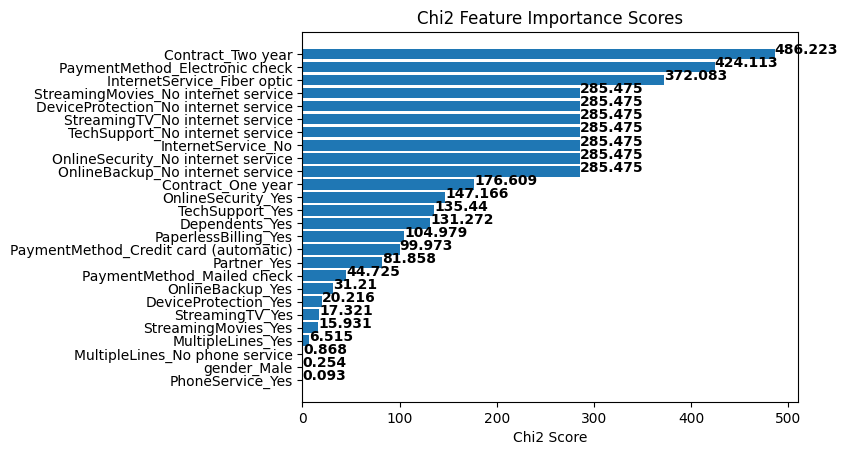

In [ ]:
from sklearn.feature_selection import chi2


categorical_features = df.select_dtypes(include=['object']).columns


if target_name in categorical_features:
    categorical_features = categorical_features.drop(target_name)


X = pd.get_dummies(df[categorical_features], drop_first=True)
y = df[target_name]


chi2_scores, p_values = chi2(X, y)


chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'P-value': p_values})


chi2_results = chi2_results.sort_values('Chi2 Score', ascending=False)


print(chi2_results)



fig, ax = plt.subplots()
y_pos = np.arange(len(chi2_results))
ax.barh(y_pos, chi2_results['Chi2 Score'], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels(chi2_results['Feature'])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Chi2 Score")
ax.set_title("Chi2 Feature Importance Scores")


for i, v in enumerate(chi2_results['Chi2 Score']):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

<hr>

#### **Wrapper-Based Feature Selection Techniques**
  * **Forward Selection**
  * **Backward Selection**
  * **Recursive Feature Elimination (RFE)**
  * **Exhaustive Feature Selection**

<hr>

##### **Forward Selection**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

data = load_breast_cancer()

X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

Selected Features: ('0', '1', '4', '21', '22')
Accuracy: 0.9548417721518987


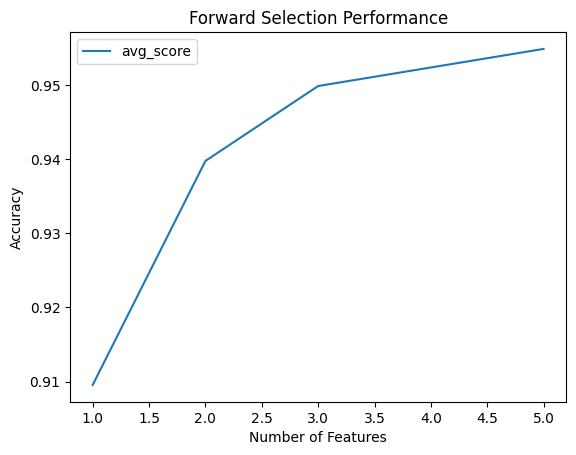

In [ ]:
# Define the forward selection object
sfs = SFS(model, k_features=5, forward=True, floating=False, scoring="accuracy", cv=5)

# Perform forward selection on the training set
sfs.fit(X_train, y_train)

# Print the selected features
print("Selected Features:", sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

In [ ]:
selected_col = df.iloc[:, [0, 1, 4, 18, 19]]

In [ ]:
selected_col

,gender,SeniorCitizen,tenure,TotalCharges,Churn
0,Female,0,1,29.85,No
1,Male,0,34,1889.50,No
2,Male,0,2,108.15,Yes
3,Male,0,45,1840.75,No
4,Female,0,2,151.65,Yes
...,...,...,...,...,...
7038,Male,0,24,1990.50,No
7039,Female,0,72,7362.90,No
7040,Female,0,11,346.45,No
7041,Male,1,4,306.60,Yes
